In [5]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
import matplotlib.pyplot as plt

In [2]:
dirpath = "L5_data"
out_fp = os.path.join(dirpath, "Helsinki_DEM2x2m_Mosaic.tif")

# Make a search criteria to select the DEM files
search_criteria = "L*.tif"
q = os.path.join(dirpath, search_criteria)
print(q)

L5_data/L*.tif


In [3]:
# glob function can be used to list files from a directory with specific criteria
dem_fps = glob.glob(q)

# Files that were found:
dem_fps

['L5_data/L4134F.tif',
 'L5_data/L4133C.tif',
 'L5_data/L4133B.tif',
 'L5_data/L4134E.tif',
 'L5_data/L4133A.tif',
 'L5_data/L4134D.tif',
 'L5_data/L4134A.tif',
 'L5_data/L4133E.tif',
 'L5_data/L4134C.tif',
 'L5_data/L4134B.tif',
 'L5_data/L4133F.tif',
 'L5_data/L4133D.tif']

In [4]:
# List for the source files
src_files_to_mosaic = []

# Iterate over raster files and add them to source -list in 'read mode'
for fp in dem_fps:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)

src_files_to_mosaic

[<open DatasetReader name='L5_data/L4134F.tif' mode='r'>,
 <open DatasetReader name='L5_data/L4133C.tif' mode='r'>,
 <open DatasetReader name='L5_data/L4133B.tif' mode='r'>,
 <open DatasetReader name='L5_data/L4134E.tif' mode='r'>,
 <open DatasetReader name='L5_data/L4133A.tif' mode='r'>,
 <open DatasetReader name='L5_data/L4134D.tif' mode='r'>,
 <open DatasetReader name='L5_data/L4134A.tif' mode='r'>,
 <open DatasetReader name='L5_data/L4133E.tif' mode='r'>,
 <open DatasetReader name='L5_data/L4134C.tif' mode='r'>,
 <open DatasetReader name='L5_data/L4134B.tif' mode='r'>,
 <open DatasetReader name='L5_data/L4133F.tif' mode='r'>,
 <open DatasetReader name='L5_data/L4133D.tif' mode='r'>]

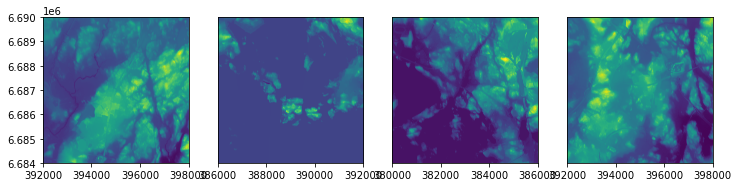

In [6]:
# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic[0], ax=ax1)
show(src_files_to_mosaic[1], ax=ax2)
show(src_files_to_mosaic[2], ax=ax3)
show(src_files_to_mosaic[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)

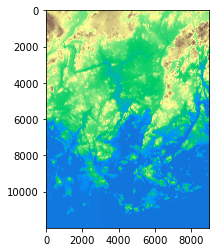

In [7]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic)

# Plot the result
show(mosaic, cmap='terrain')

In [8]:
# Copy the metadata
out_meta = src.meta.copy()

# Update the metadata
out_meta.update({
    "driver": "GTiff",
     "height": mosaic.shape[1],
     "width": mosaic.shape[2],
     "transform": out_trans,
     "crs": "+proj=utm +zone=35 +ellps=GRS80 +units=m +no_defs "
})

In [9]:
# Write the mosaic raster to disk
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)